In [4]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import numpy as np
import warnings
from nltk.corpus import stopwords


In [5]:
warnings.simplefilter(action='ignore')

In [6]:
data = pd.read_csv(r"C:\kmeans\relatoriopedidosteste.csv",sep=";")
data.dropna(inplace=True)

In [7]:
items = data[['refs','desc','pedido','valor_un']]
items['desc'] = items['desc'].apply(lambda k: str(k).lower().strip())

In [8]:
data = pd.read_csv(r"C:\kmeans\relatoriopedidosteste.csv",sep=";")
data.dropna(inplace=True)

data = data[['pedido','valor_ab','quantidade_a','quantidadef','quantidad_s',
             'cliente_pedidos','totais','lote_pedidos']].applymap(lambda k: float(str(k).replace(".","").replace(",",".")))

data[['cliente_pedidos','lote_pedidos','pedido']] = data[['cliente_pedidos'
                       ,'lote_pedidos','pedido']].applymap(lambda k: str(k).split(".0")[0])


data[['cliente_pedidos','lote_pedidos','pedido']] = data[['cliente_pedidos'
                  ,'lote_pedidos','pedido']].astype(int)

In [9]:
data

,pedido,valor_ab,quantidade_a,quantidadef,quantidad_s,cliente_pedidos,totais,lote_pedidos
0,232209,3738.0,10.0,0.0,10.0,1666,607889.0,7040
1,232209,3767.0,10.0,0.0,10.0,1666,607889.0,7040
2,232209,3767.0,10.0,0.0,10.0,1666,607889.0,7040
3,232209,1975.0,10.0,0.0,10.0,1666,607889.0,7040
4,232209,1975.0,10.0,0.0,10.0,1666,607889.0,7040
...,...,...,...,...,...,...,...,...
7771,234876,16197.0,190.0,0.0,190.0,1789,995926.0,7074
7772,234876,7302.0,10.0,0.0,10.0,1789,995926.0,7074
7773,234876,22184.0,130.0,0.0,130.0,1789,995926.0,7074
7774,234876,20649.0,10.0,0.0,10.0,1789,995926.0,7074


In [10]:
inertia = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data)
    inertia.append((i,kmeans.inertia_,))

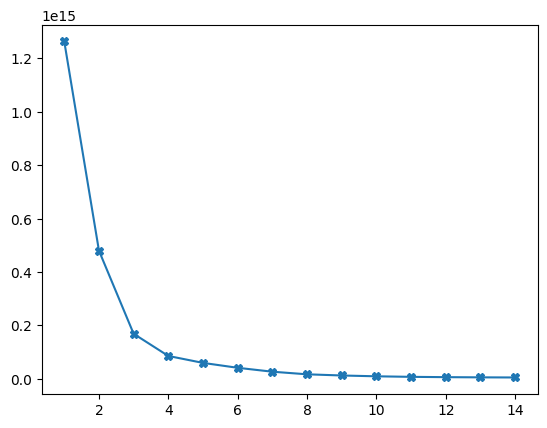

In [11]:
plt.plot([w[0] for w in inertia],[w[1] for w in inertia], marker="X")


In [12]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=0)
#kmeans.fit(data)
kmeans.fit_predict(data)
cluster_list = kmeans.labels_

In [13]:
kmeans

KMeans(n_clusters=3, n_init=10, random_state=0)

<Axes: xlabel='clusters'>

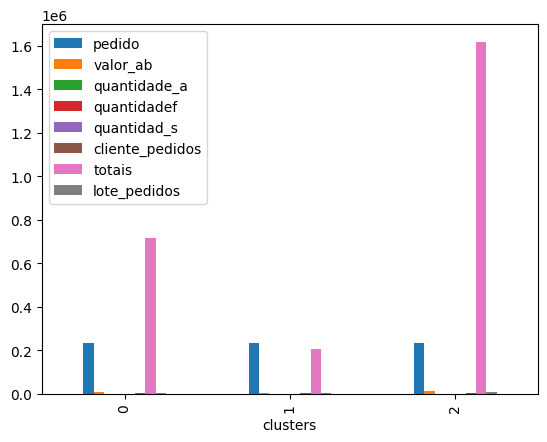

In [14]:
data["clusters"] = cluster_list
data.groupby("clusters").aggregate("mean").plot.bar()

In [15]:
teste = kmeans.fit_predict(data)
data['teste'] = teste

In [16]:
data.teste.unique()

array([0, 1, 2])

In [17]:

data['Classificação'] = data['teste'].apply(lambda k: 'Alto' if k == 2 else('Médio' if k == 1 else('Baixo' if k == 0 else None)))

In [18]:
data

,pedido,valor_ab,quantidade_a,quantidadef,quantidad_s,cliente_pedidos,totais,lote_pedidos,clusters,teste,Classificação
0,232209,3738.0,10.0,0.0,10.0,1666,607889.0,7040,0,0,Baixo
1,232209,3767.0,10.0,0.0,10.0,1666,607889.0,7040,0,0,Baixo
2,232209,3767.0,10.0,0.0,10.0,1666,607889.0,7040,0,0,Baixo
3,232209,1975.0,10.0,0.0,10.0,1666,607889.0,7040,0,0,Baixo
4,232209,1975.0,10.0,0.0,10.0,1666,607889.0,7040,0,0,Baixo
...,...,...,...,...,...,...,...,...,...,...,...
7771,234876,16197.0,190.0,0.0,190.0,1789,995926.0,7074,0,0,Baixo
7772,234876,7302.0,10.0,0.0,10.0,1789,995926.0,7074,0,0,Baixo
7773,234876,22184.0,130.0,0.0,130.0,1789,995926.0,7074,0,0,Baixo
7774,234876,20649.0,10.0,0.0,10.0,1789,995926.0,7074,0,0,Baixo


In [19]:
data.head(30)
data.sort_values('totais',ascending=False)
c2 = data[data['clusters'] == 2]
c2

,pedido,valor_ab,quantidade_a,quantidadef,quantidad_s,cliente_pedidos,totais,lote_pedidos,clusters,teste,Classificação
2117,231986,3623.0,20.0,0.0,20.0,2183,1470501.0,7040,2,2,Alto
2118,231986,12342.0,80.0,0.0,80.0,2183,1470501.0,7040,2,2,Alto
2119,231986,9813.0,10.0,0.0,10.0,2183,1470501.0,7040,2,2,Alto
2120,231986,9813.0,10.0,0.0,10.0,2183,1470501.0,7040,2,2,Alto
2121,231986,10497.0,10.0,0.0,10.0,2183,1470501.0,7040,2,2,Alto
...,...,...,...,...,...,...,...,...,...,...,...
2981,231976,73790.0,10.0,0.0,10.0,2183,1506825.0,7040,2,2,Alto
2982,231976,117140.0,10.0,0.0,10.0,2183,1506825.0,7040,2,2,Alto
2983,231976,143911.0,10.0,0.0,10.0,2183,1506825.0,7040,2,2,Alto
2984,231976,158095.0,10.0,0.0,10.0,2183,1506825.0,7040,2,2,Alto


In [20]:
c0 = data[data['clusters'] == 0]
c0

,pedido,valor_ab,quantidade_a,quantidadef,quantidad_s,cliente_pedidos,totais,lote_pedidos,clusters,teste,Classificação
0,232209,3738.0,10.0,0.0,10.0,1666,607889.0,7040,0,0,Baixo
1,232209,3767.0,10.0,0.0,10.0,1666,607889.0,7040,0,0,Baixo
2,232209,3767.0,10.0,0.0,10.0,1666,607889.0,7040,0,0,Baixo
3,232209,1975.0,10.0,0.0,10.0,1666,607889.0,7040,0,0,Baixo
4,232209,1975.0,10.0,0.0,10.0,1666,607889.0,7040,0,0,Baixo
...,...,...,...,...,...,...,...,...,...,...,...
7771,234876,16197.0,190.0,0.0,190.0,1789,995926.0,7074,0,0,Baixo
7772,234876,7302.0,10.0,0.0,10.0,1789,995926.0,7074,0,0,Baixo
7773,234876,22184.0,130.0,0.0,130.0,1789,995926.0,7074,0,0,Baixo
7774,234876,20649.0,10.0,0.0,10.0,1789,995926.0,7074,0,0,Baixo


In [21]:
c1 = data[data['clusters'] == 1]
c1

,pedido,valor_ab,quantidade_a,quantidadef,quantidad_s,cliente_pedidos,totais,lote_pedidos,clusters,teste,Classificação
132,234896,11853.0,10.0,0.0,10.0,1666,11853.0,7056,1,1,Médio
133,233682,4757.0,10.0,0.0,10.0,1505,35673.0,7040,1,1,Médio
134,233682,4757.0,10.0,0.0,10.0,1505,35673.0,7040,1,1,Médio
135,233682,4757.0,10.0,0.0,10.0,1505,35673.0,7040,1,1,Médio
136,233682,20114.0,10.0,0.0,10.0,1505,35673.0,7040,1,1,Médio
...,...,...,...,...,...,...,...,...,...,...,...
7685,234797,995.0,10.0,0.0,10.0,1789,211358.0,0,1,1,Médio
7686,234797,320.0,40.0,0.0,40.0,1789,211358.0,0,1,1,Médio
7687,234797,4200.0,10.0,0.0,10.0,1789,211358.0,0,1,1,Médio
7688,234797,6826.0,40.0,0.0,40.0,1789,211358.0,0,1,1,Médio


In [22]:
cluster_list = kmeans.labels_
cluster_list

array([0, 0, 0, ..., 0, 0, 0])